In [9]:
import sys
sys.path.append('../')
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from machinelearning.mlpipeline import MLPipelines

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##### Load data and initialize `MLPipelines` class

In [2]:
csv_dir = "../data/gc_mc.csv"
label = "Factor1"

mlpipe = MLPipelines(label=label, csv_dir=csv_dir)
print(mlpipe)

Label mapping: {0: 'CASE', 1: 'CONTROL'}
There is no selected classifier.
Number of rows: 78 
Number of columns: 61


##### Perform model selection using **Nested Cross Validation**

Outer fold of 1 round:  0% |             | Elapsed Time: 0:00:00 ETA:  --:--:--
Outer fold of 1 round: 33% |████▎        | Elapsed Time: 0:00:10 ETA:   0:00:20
Outer fold of 1 round: 66% |████████▋    | Elapsed Time: 0:00:21 ETA:   0:00:10
Outer fold of 1 round:100% |█████████████| Elapsed Time: 0:00:22 Time:  0:00:22


Finished with 1 round after 0.01 hours.
Finished with 6 estimators


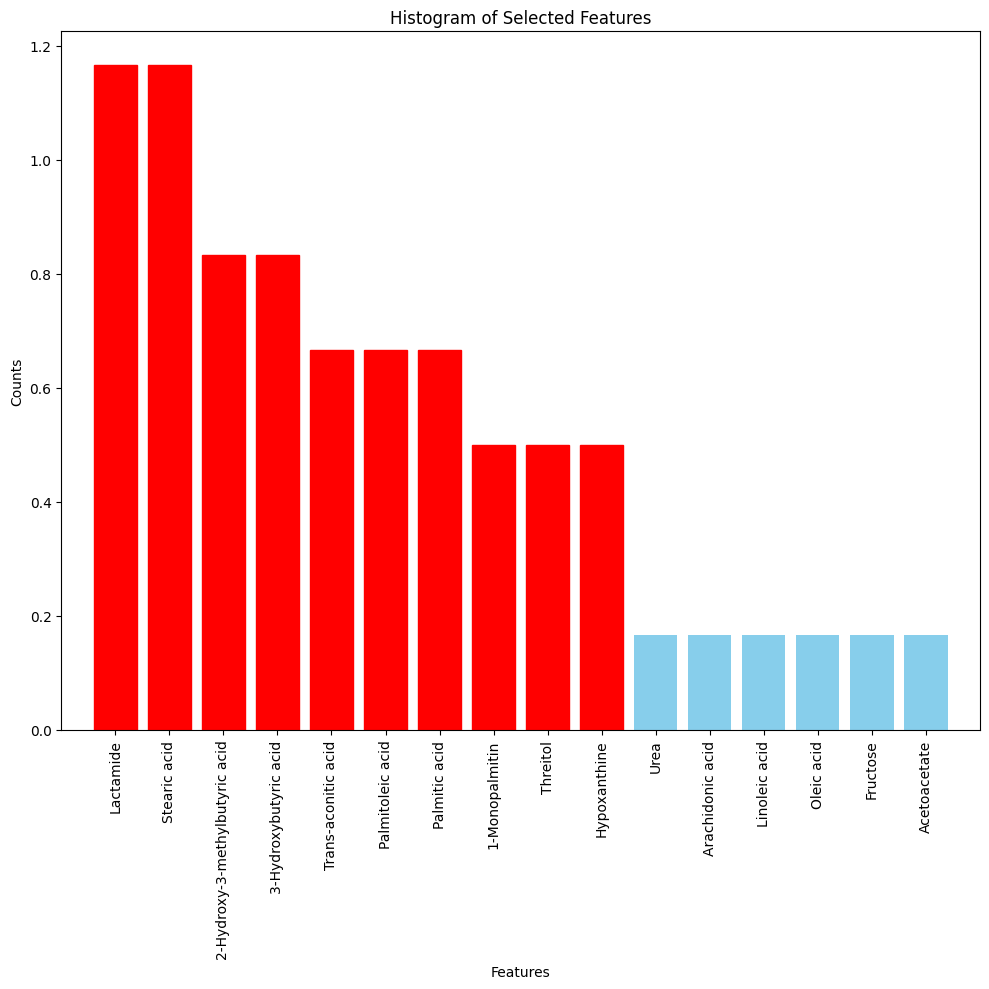

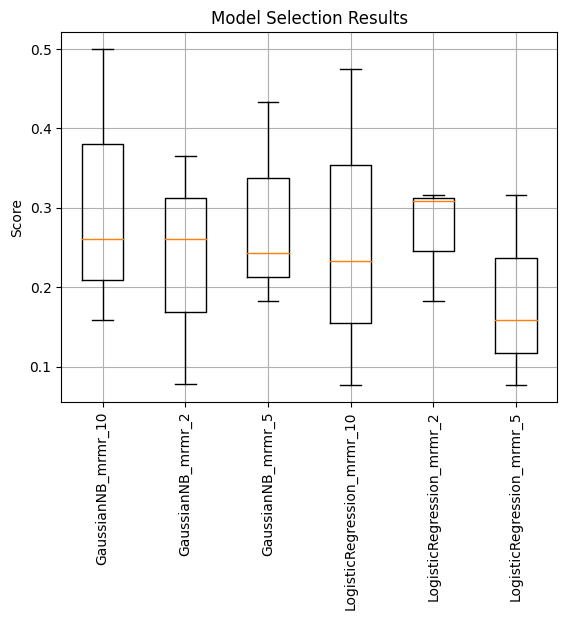

In [3]:
scores, features_list, all_featues = mlpipe.nested_cv(include=[LogisticRegression(), GaussianNB()], inner_splits=3, outer_splits=3, rounds=1, num_features=[2,5,10])

In [7]:
mlpipe.normalize()

Converting the raw data with minmax normalization method....
Normalization completed.


In [16]:
# autorealod    
%autoreload 2
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
# Create a parameter grid for XGBoost classifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

print('Training with RandomizedSearchCV:')
mlpipe.random_search(estimator=XGBClassifier(), parameter_grid=param_grid)
print()
print('Training with GridSearchCV:')
mlpipe.grid_search(estimator=XGBClassifier(), parameter_grid=param_grid)

Training with RandomizedSearchCV:
Best parameters: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}
Best matthews_corrcoef: 0.19995617507064384

Training with GridSearchCV:
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best matthews_corrcoef: 0.19995617507064384


In [17]:
mlpipe.bayesian_search()

  0%|          | 0/100 [00:00<?, ?it/s]

[W 2024-04-29 13:42:16,246] Trial 22 failed with parameters: {'learning_rate': 0.10708250892007037, 'n_estimators': 109, 'max_depth': 10, 'min_child_weight': 3, 'gamma': 1.0718093362251746, 'subsample': 0.44376602999290116, 'colsample_bytree': 0.3646042523343808, 'reg_alpha': 0.9218082604632459, 'reg_lambda': 0.7852714840023166, 'scale_pos_weight': 1.7554004743210179, 'booster': 'dart', 'tree_method': 'hist'} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/home/WUR/g0012069/env/main/lib/python3.10/site-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "/home/WUR/g0012069/AI4META/notebooks/../machinelearning/mlestimator.py", line 256, in objective
    score = cross_val_score(cls, X, y, scoring=scoring, cv=cv).mean()
  File "/home/WUR/g0012069/env/main/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 562, in cross_val_score
    cv_results = cross_validate(
  File

KeyboardInterrupt: 